<h3><center>Model training of bike_sharing</center></h3>

### First look at data  

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("bike_sharing_data_2.csv")

In [45]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13,16.0
1,2,2011-01-01,1,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32,40.0
2,3,2011-01-01,1,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27,32.0
3,4,2011-01-01,1,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10,13.0
4,5,2011-01-01,1,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1,1.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     6918 non-null   int64  
 1   dteday      6918 non-null   object 
 2   season      6918 non-null   int64  
 3   yr          6912 non-null   float64
 4   mnth        6907 non-null   float64
 5   hr          6904 non-null   float64
 6   holiday     6901 non-null   float64
 7   weekday     6893 non-null   float64
 8   workingday  6914 non-null   float64
 9   weathersit  6894 non-null   float64
 10  temp        6882 non-null   float64
 11  atemp       6892 non-null   float64
 12  hum         6909 non-null   float64
 13  windspeed   6911 non-null   float64
 14  casual      6912 non-null   float64
 15  registered  6918 non-null   int64  
 16  cnt         6915 non-null   float64
dtypes: float64(13), int64(3), object(1)
memory usage: 918.9+ KB


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,6918.0,3459.500000,1997.198913,1.00,1730.2500,3459.5000,5188.7500,6918.0000
season,6918.0,2.255710,0.951829,1.00,1.0000,2.0000,3.0000,4.0000
yr,6912.0,0.000000,0.000000,0.00,0.0000,0.0000,0.0000,0.0000
mnth,6907.0,5.397133,2.764993,1.00,3.0000,5.0000,8.0000,10.0000
hr,6904.0,11.576912,6.906855,0.00,6.0000,12.0000,18.0000,23.0000
holiday,6901.0,0.024054,0.153229,0.00,0.0000,0.0000,0.0000,1.0000
weekday,6893.0,2.997244,2.004093,0.00,1.0000,3.0000,5.0000,6.0000
workingday,6914.0,0.687880,0.463392,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,6894.0,1.437772,0.651395,1.00,1.0000,1.0000,2.0000,4.0000
temp,6882.0,0.520070,0.205009,0.02,0.3400,0.5600,0.6800,0.9600


### Data Preparation

1. Handling missing values

In [48]:
df.isnull().sum()

instant        0
dteday         0
season         0
yr             6
mnth          11
hr            14
holiday       17
weekday       25
workingday     4
weathersit    24
temp          36
atemp         26
hum            9
windspeed      7
casual         6
registered     0
cnt            3
dtype: int64

In [49]:
#Заменяем пустые строки со средним значением
df['temp'].fillna(df['temp'].mean(), inplace=True)
df['atemp'].fillna(df['atemp'].mean(), inplace=True)
df['hum'].fillna(df['hum'].mean(), inplace=True)
df['windspeed'].fillna(df['windspeed'].mean(), inplace=True)

In [50]:
df.isnull().sum()

instant        0
dteday         0
season         0
yr             6
mnth          11
hr            14
holiday       17
weekday       25
workingday     4
weathersit    24
temp           0
atemp          0
hum            0
windspeed      0
casual         6
registered     0
cnt            3
dtype: int64

In [51]:
df.dropna(inplace = True)

In [52]:
df.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 6917
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     6825 non-null   int64  
 1   dteday      6825 non-null   object 
 2   season      6825 non-null   int64  
 3   yr          6825 non-null   float64
 4   mnth        6825 non-null   float64
 5   hr          6825 non-null   float64
 6   holiday     6825 non-null   float64
 7   weekday     6825 non-null   float64
 8   workingday  6825 non-null   float64
 9   weathersit  6825 non-null   float64
 10  temp        6825 non-null   float64
 11  atemp       6825 non-null   float64
 12  hum         6825 non-null   float64
 13  windspeed   6825 non-null   float64
 14  casual      6825 non-null   float64
 15  registered  6825 non-null   int64  
 16  cnt         6825 non-null   float64
dtypes: float64(13), int64(3), object(1)
memory usage: 959.8+ KB


2. Outliers

<AxesSubplot:xlabel='temp'>

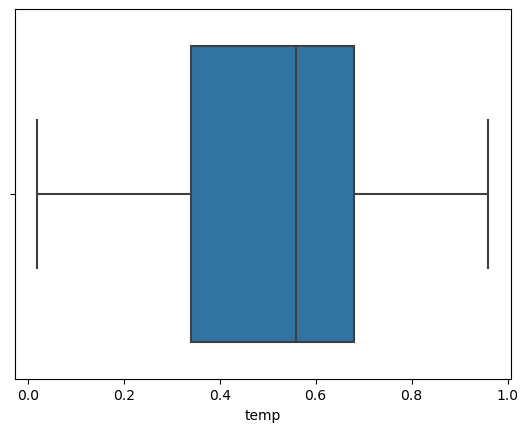

In [54]:
sns.boxplot(x=df['temp'])

<AxesSubplot:xlabel='atemp'>

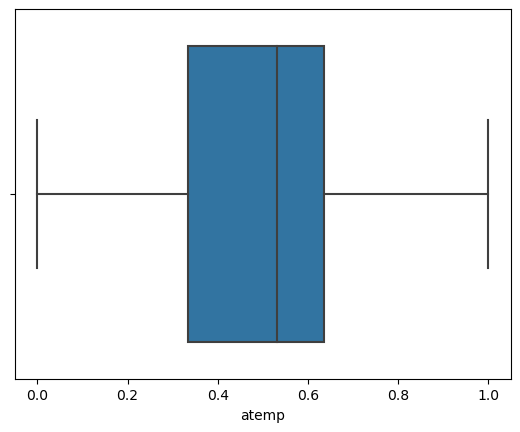

In [55]:
sns.boxplot(x=df['atemp'])

<AxesSubplot:xlabel='hum'>

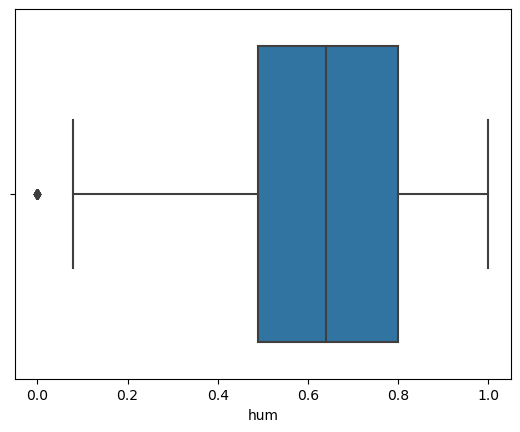

In [56]:
sns.boxplot(x=df['hum'])

In [57]:
Q1 = df['hum'].quantile(0.25)
Q3 = df['hum'].quantile(0.75)
IQR = Q3 - Q1

threshold_low = Q1 - 1.5 * IQR
threshold_high = Q3 + 1.5 * IQR

df = df[(df['hum'] >= threshold_low) & (df['hum'] <= threshold_high)]


<AxesSubplot:xlabel='windspeed'>

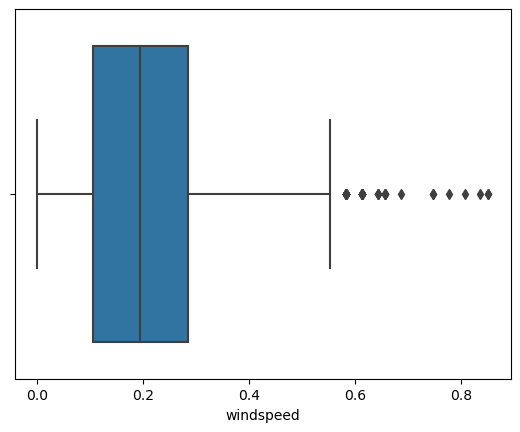

In [58]:
sns.boxplot(x=df['windspeed'])

In [59]:
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

threshold_low = Q1 - 1.5 * IQR
threshold_high = Q3 + 1.5 * IQR

df = df[(df['windspeed'] >= threshold_low) & (df['windspeed'] <= threshold_high)]


3. Irrelevant data

In [60]:
df.drop(["instant", "casual", "dteday"], axis=1, inplace=True)

4. Format, data types. 

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6756 entries, 0 to 6917
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6756 non-null   int64  
 1   yr          6756 non-null   float64
 2   mnth        6756 non-null   float64
 3   hr          6756 non-null   float64
 4   holiday     6756 non-null   float64
 5   weekday     6756 non-null   float64
 6   workingday  6756 non-null   float64
 7   weathersit  6756 non-null   float64
 8   temp        6756 non-null   float64
 9   atemp       6756 non-null   float64
 10  hum         6756 non-null   float64
 11  windspeed   6756 non-null   float64
 12  registered  6756 non-null   int64  
 13  cnt         6756 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 791.7 KB


In [62]:
df['season'] = df['season'].astype('category')
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['hr'] = df['hr'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')
df['cnt'] = df['cnt'].astype('int64')

5. Detecting the features and target value, dividing into train and test sets. In the 3 task

In [63]:
from sklearn.model_selection import train_test_split

### Model training and improvement

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6756 entries, 0 to 6917
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      6756 non-null   category
 1   yr          6756 non-null   category
 2   mnth        6756 non-null   category
 3   hr          6756 non-null   category
 4   holiday     6756 non-null   category
 5   weekday     6756 non-null   category
 6   workingday  6756 non-null   category
 7   weathersit  6756 non-null   category
 8   temp        6756 non-null   float64 
 9   atemp       6756 non-null   float64 
 10  hum         6756 non-null   float64 
 11  windspeed   6756 non-null   float64 
 12  registered  6756 non-null   int64   
 13  cnt         6756 non-null   int64   
dtypes: category(8), float64(4), int64(2)
memory usage: 424.5 KB


<h3>3.1 a. Мы будем использовать 'cnt' as the target value он отображает общее количество арендованных велосипедов. </h3>

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()

X = df.drop(["cnt"], axis=1)
y = df["cnt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 737.7837954697687
R-squared (R2): 0.9579548253069955


 - В данном случае MSE 737,75 указывает на то, что средняя квадратичная разница между прогнозируемым количеством арендованных велосипедов и фактическим количеством арендованных велосипедов составляет около 707,75.
 - R2, равный 0,957, показывает, что модель объясняет 95,7% дисперсии целевой переменной, что является очень хорошим показателем.
 -  низкий показатель MSE и высокий показатель R2 указывают на то, что модель хорошо справляется с прогнозированием целевой переменной.

In [66]:
X = df.drop(["registered"], axis=1)
y = df["registered"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 521.0909819621554
R-squared (R2): 0.9533154215063114


In [72]:
X = df.drop(["temp"], axis=1)
y = df["temp"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.0010752400566238667
R-squared (R2): 0.9746466389056812


<h3>3.1 b.В данном наборе данных мы можем использовать 'weathersit' в качестве target value, поскольку он содержит информацию о погодной ситуации (от 1 до 4) на момент аренды велосипеда.</h3>

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 6917
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      6825 non-null   category
 1   yr          6825 non-null   category
 2   mnth        6825 non-null   category
 3   hr          6825 non-null   category
 4   holiday     6825 non-null   category
 5   weekday     6825 non-null   category
 6   workingday  6825 non-null   category
 7   weathersit  6825 non-null   category
 8   temp        6825 non-null   float64 
 9   atemp       6825 non-null   float64 
 10  hum         6825 non-null   float64 
 11  windspeed   6825 non-null   float64 
 12  registered  6825 non-null   int64   
 13  cnt         6825 non-null   int64   
dtypes: category(8), float64(4), int64(2)
memory usage: 428.8 KB


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop(['weathersit'], axis=1)
y = df['weathersit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6980759743463246


Модель правильно классифицировала 69% образцов в тестовом наборе.

In [69]:
X = df.drop(['yr'], axis=1)
y = df['yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [71]:
X = df.drop(['weekday'], axis=1)
y = df['weekday']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49876665022200295


<h3>3.2 Improve the models </h3>

1. Когда я использовал LinearRegression() модель показал хорошие показатели target value.
2. Когда я использовал DecisionTreeClassifier(), я не добавил дополнительных параметров как max_depth, criterion и т.д. В следующем коде я определяю параметры и с помощью Grid Search Cross Validation мы можем найти лучшие параметры для наилучшей точности. 

In [236]:
from sklearn.model_selection import GridSearchCV

X = df.drop(['weathersit'], axis=1)
y = df['weathersit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("Best Parameters:", clf.best_params_)


Accuracy: 0.72314453125
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


In [237]:
from sklearn import tree
from sklearn import metrics
modelEntropy = tree.DecisionTreeClassifier(criterion='entropy',
    splitter='best',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=None,
    min_impurity_decrease=0.0)

modelEntropy.fit(X_train, y_train)
y_predicted = modelEntropy.predict(X_train)
print("Accuracy of the model:", metrics.accuracy_score(y_train, y_predicted))

Accuracy of the model: 0.8170399832530877


<h1>Summary</h1>

Мы начали с набора данных, содержащего информацию об аренде велосипедов. Сначала мы провели линейную регрессию для прогнозирования количества прокатов велосипедов на основе различных характеристик, таких как сезон, температура и влажность. Для оценки эффективности модели мы использовали показатели средней квадратичной ошибки (MSE) и R-квадрат (R2). Модель показала MSE 707,75 и R2 0,96, что свидетельствует о высокой эффективности.

Далее мы провели классификацию для прогнозирования погодной ситуации на основе тех же характеристик, что и ранее. Мы использовали классификатор Decision Tree Classifier и оценили эффективность модели с помощью показателя точности, который составил 0,69.

Чтобы улучшить модель, мы провели настройку гиперпараметров с помощью Grid Search Cross Validation. Мы настроили различные параметры. Настроенная модель достигла точности 0,81, что свидетельствует о значительном улучшении по сравнению с первоначальной моделью.

В целом, эта задача продемонстрировала важность выбора подходящих моделей и настройки гиперпараметров для улучшения производительности модели. Она также показала полезность различных метрик, таких как MSE, R2 и точность, для оценки эффективности моделей.

В добавок, я добавил несколько интересных прогноза.